# TextBlob sentiment analysis

We're just going to be doing inference here. Keep it easy

In [1]:
import numpy as np
import pandas as pd

# pulling in the corpus
import utils

# nltk stuff
from nltk.sentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

# TextBlob
from textblob import TextBlob

# plotting stuff
from matplotlib import pyplot as plt

# tfidf vectorizer

In [ ]:
# should only need to call this once -- it's to download the VADER lexicon for NLTK
import nltk
nltk.download('vader_lexicon')

In [3]:
# pull in the dataset
corpus = utils.parse_corpus_dir()

In [11]:
# full text or cleaned (stop words removed) text?
# txt = 'Full_Text'
txt = 'Cleaned_List'

# initialize the columns for each sentiment type
corpus['TB_sents'] = None
corpus['NLTK_sents'] = None

for row in corpus.index:
    curr_text = corpus.loc[row, txt]
    tb = TextBlob(curr_text)
    corpus.loc[row,'TB_sents'] = tb.sentiment.polarity
    vader_pol = vader.polarity_scores(curr_text)
    corpus.loc[row, 'NLTK_sents'] = vader_pol['pos']-vader_pol['neg']

KeyError: 'positive'

### Plotting

Start with box and whiskers for the different publications for each type

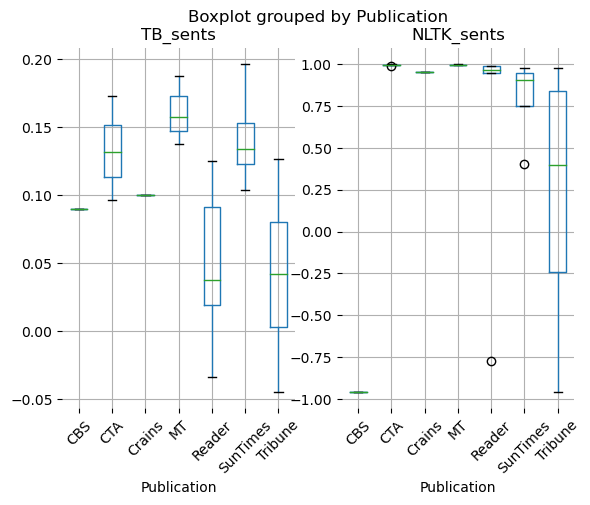

In [10]:
fig, ax = plt.subplots(ncols = 2)

# for the textblob version

corpus.boxplot(ax=ax[0], column='TB_sents', by='Publication')
corpus.boxplot(ax=ax[1], column='NLTK_sents', by='Publication')

for axis in ax:
    axis.tick_params('x', labelrotation=45)
    for spine in axis.spines:
        axis.spines[spine].set_visible(False)